# Wine Quality Prediction

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [32]:
import statsmodels.api as sm
import seaborn as sb

sb.set(style="white") 
sb.set(style="whitegrid", color_codes=True)

### Explore the dataset

In [33]:
file = 'wine_quality.csv'
df = pd.read_csv(file)
data = df.copy() #to have a copy of the dataframe just in case

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,NaN,NaN,NaN,NaN,17.000000,77.000000,0.992340,NaN,NaN,9.500000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,29.000000,118.000000,0.994890,NaN,NaN,10.300000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,41.000000,156.000000,0.996990,NaN,NaN,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Clean Data

In [35]:
#delete the type column to normalize the dataset
def deleteColumn(col):
    try:
        del df['type']
    except:
        print("Column already deleted")

deleteColumn('type')

def normalize(dataset):
    
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min())) * 10
    
    return dataNorm

df = normalize(df)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.644628,1.266667,2.168675,3.082822,0.598007,1.527778,3.778802,2.677848,2.170543,1.292135,1.159420,5.0
1,2.066116,1.466667,2.048193,0.153374,0.664452,0.451389,2.903226,1.328321,4.496124,1.516854,2.173913,5.0
2,3.553719,1.333333,2.409639,0.966258,0.681063,1.006944,2.096774,1.540389,4.186047,1.235955,3.043478,5.0
3,2.809917,1.000000,1.927711,1.211656,0.813953,1.597222,4.147465,1.636784,3.643411,1.011236,2.753623,5.0
4,2.809917,1.000000,1.927711,1.211656,0.813953,1.597222,4.147465,1.636784,3.643411,1.011236,2.753623,5.0


In [36]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [37]:
df.fillna(df.mean(), inplace=True) ## Fill the missing value by mean of all values
df.isnull().sum() #check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

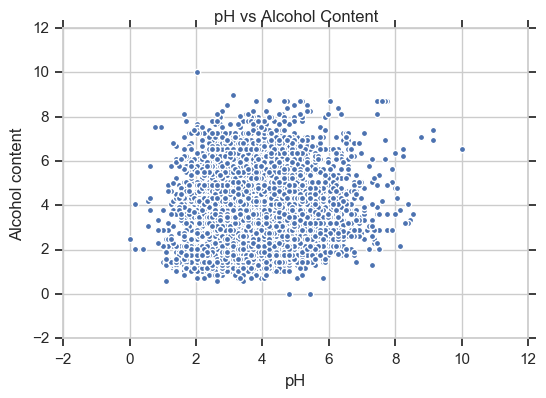

In [38]:
ph = df['pH']
alP = df['alcohol']

plt.scatter(ph, alP)
plt.xlabel('pH')
plt.ylabel('Alcohol content')
plt.title('pH vs Alcohol Content')

plt.show()

### Correlation map

##### Correlation statistic is a measure of linear association between two variables 

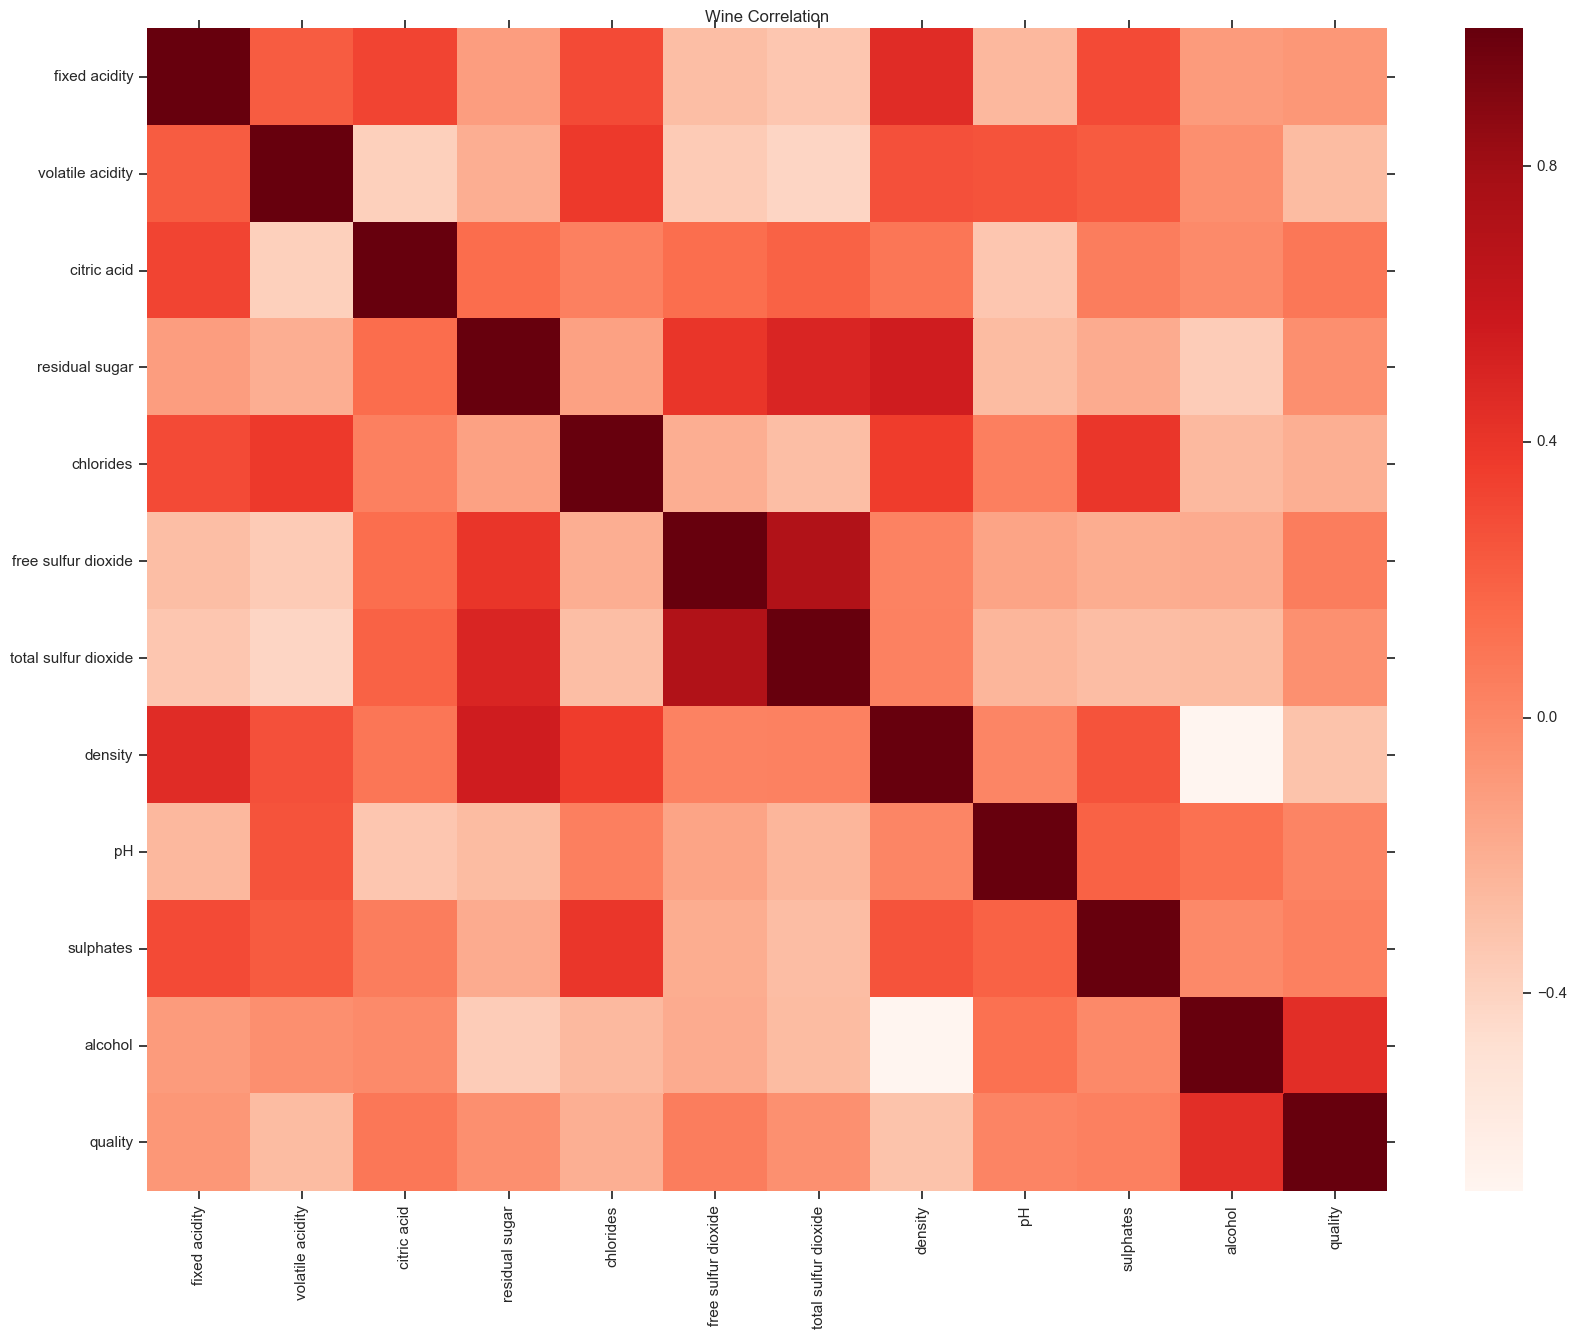

In [39]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Correlation")
corr = df.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

#### Interpretation


In [40]:
df_corr = df.corr()
df_corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818


### Histograms to visualize the distribution of data points of a particular feature

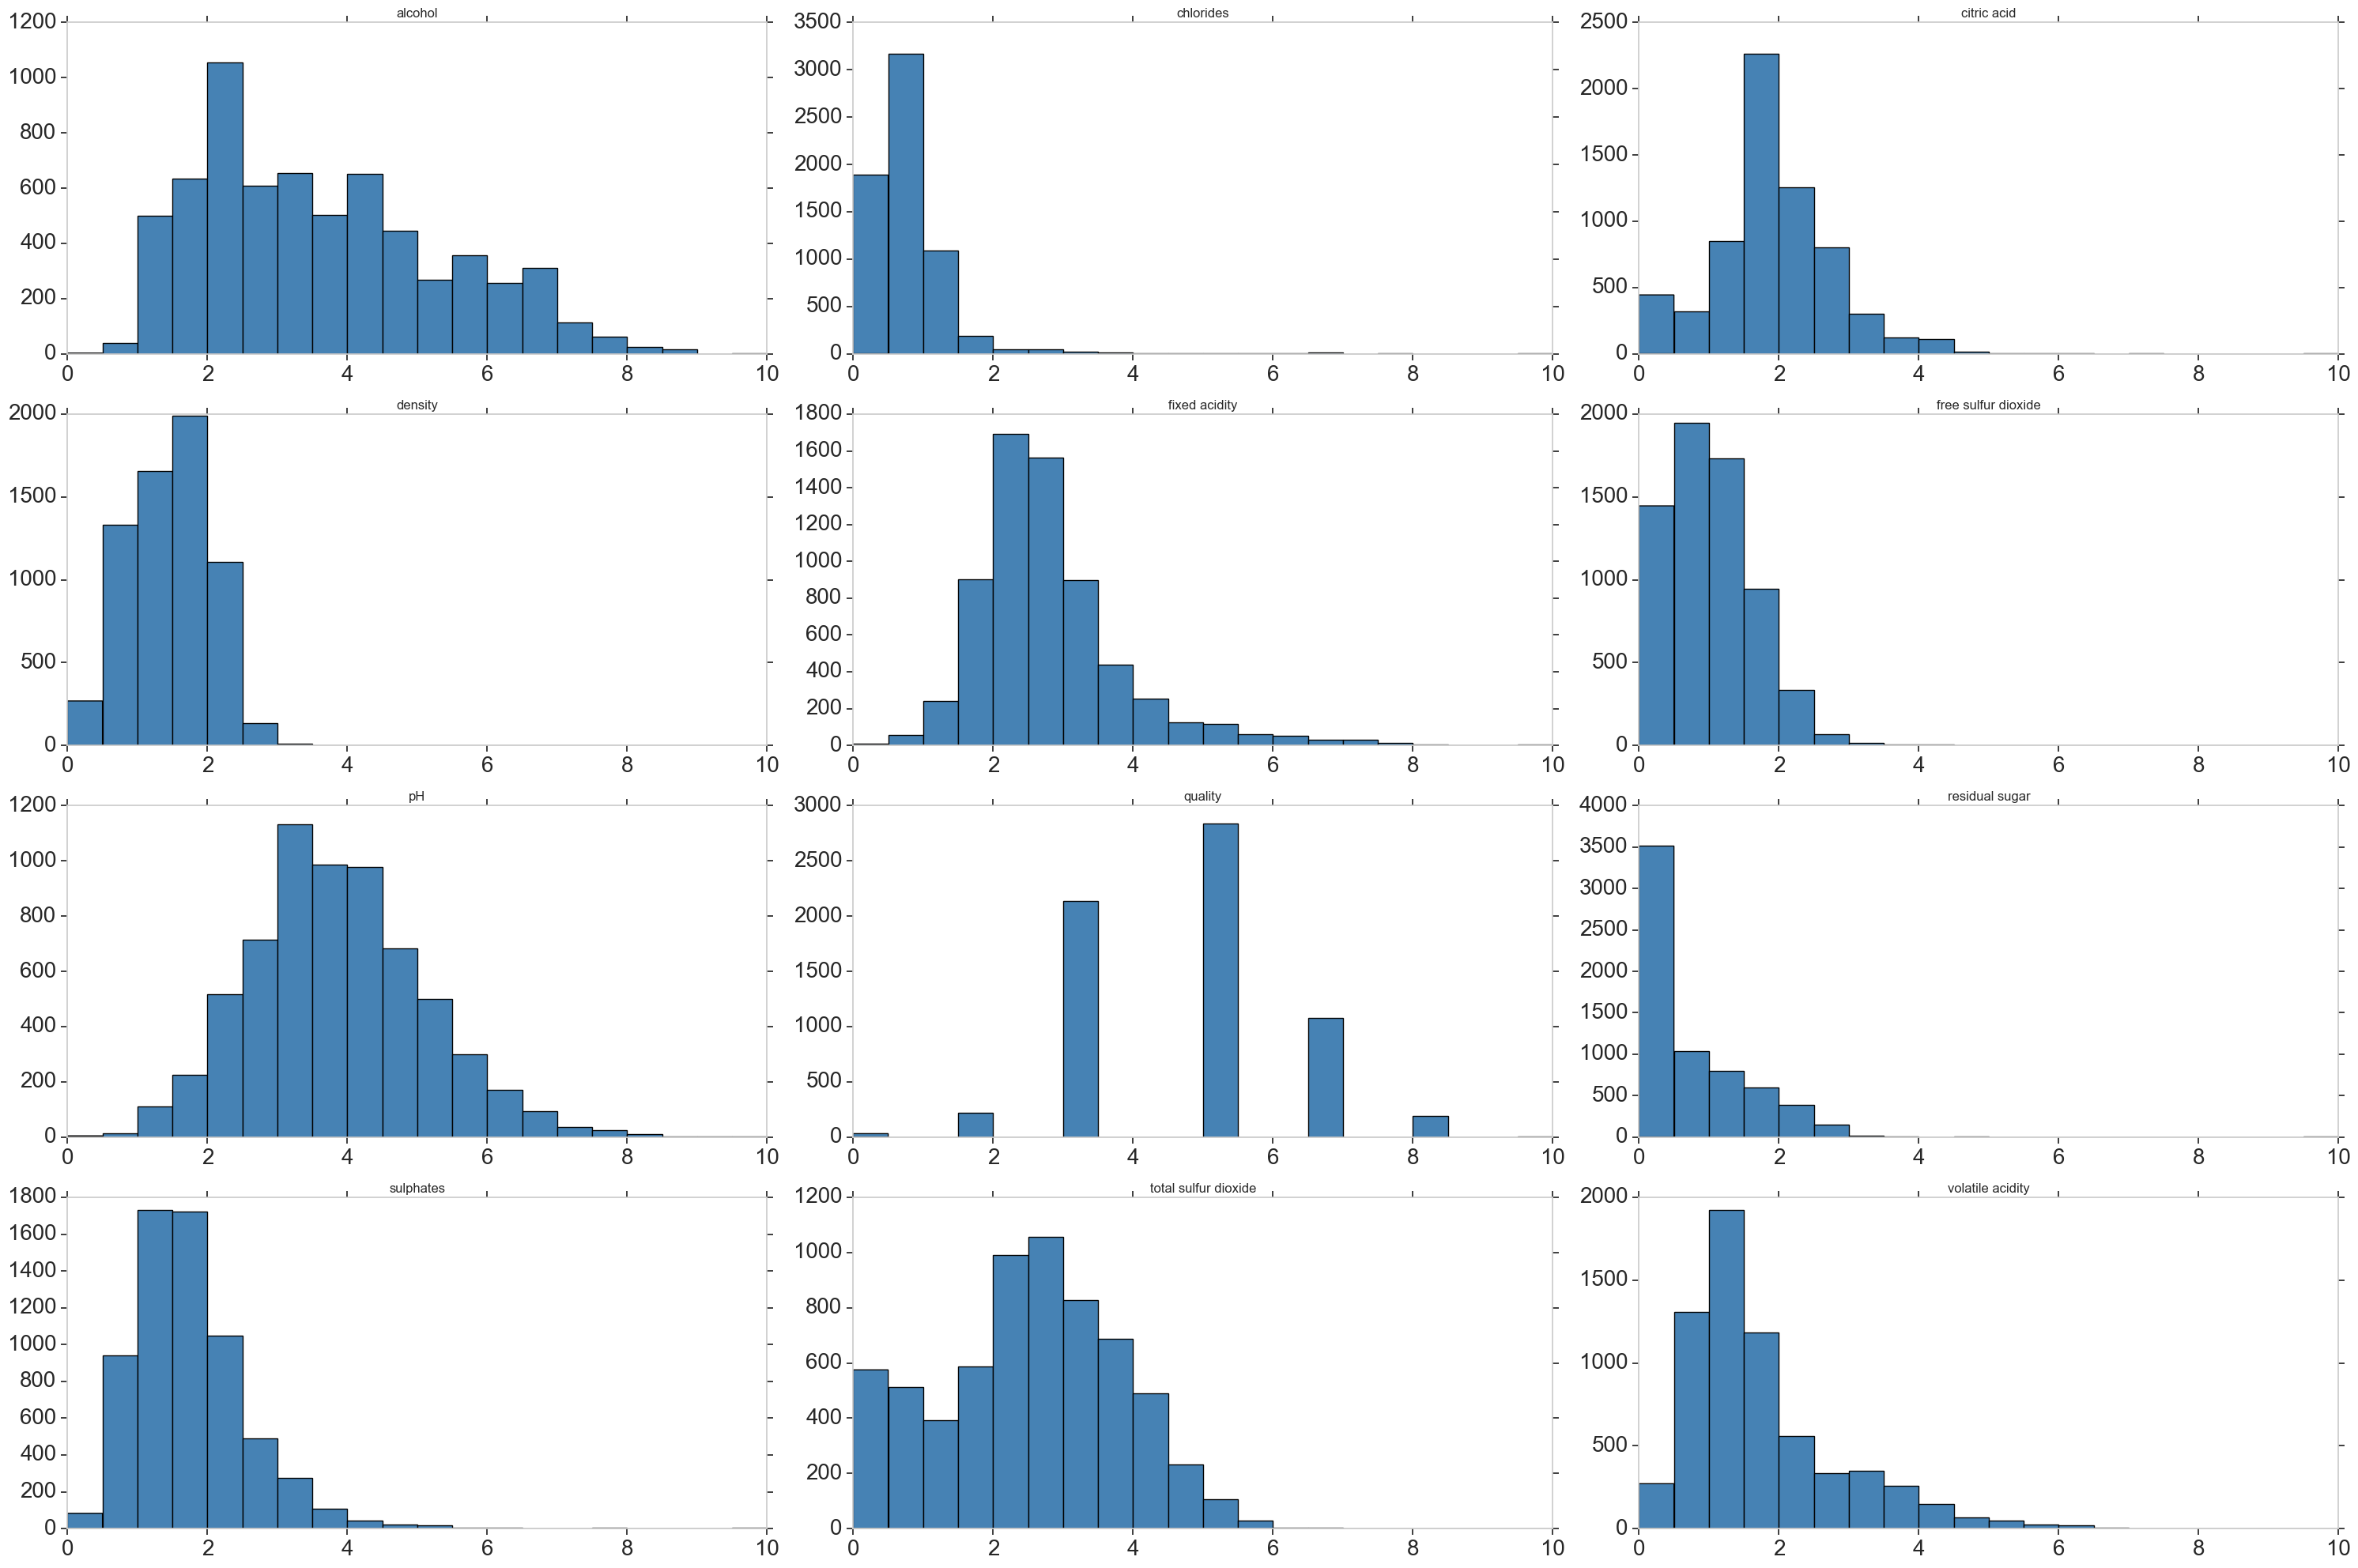

In [41]:
df.hist(bins=20, color='steelblue', edgecolor='black', linewidth=0.99,
           xlabelsize=20, ylabelsize=20, grid=False)    
plt.tight_layout(rect=(0, 0, 5, 5))

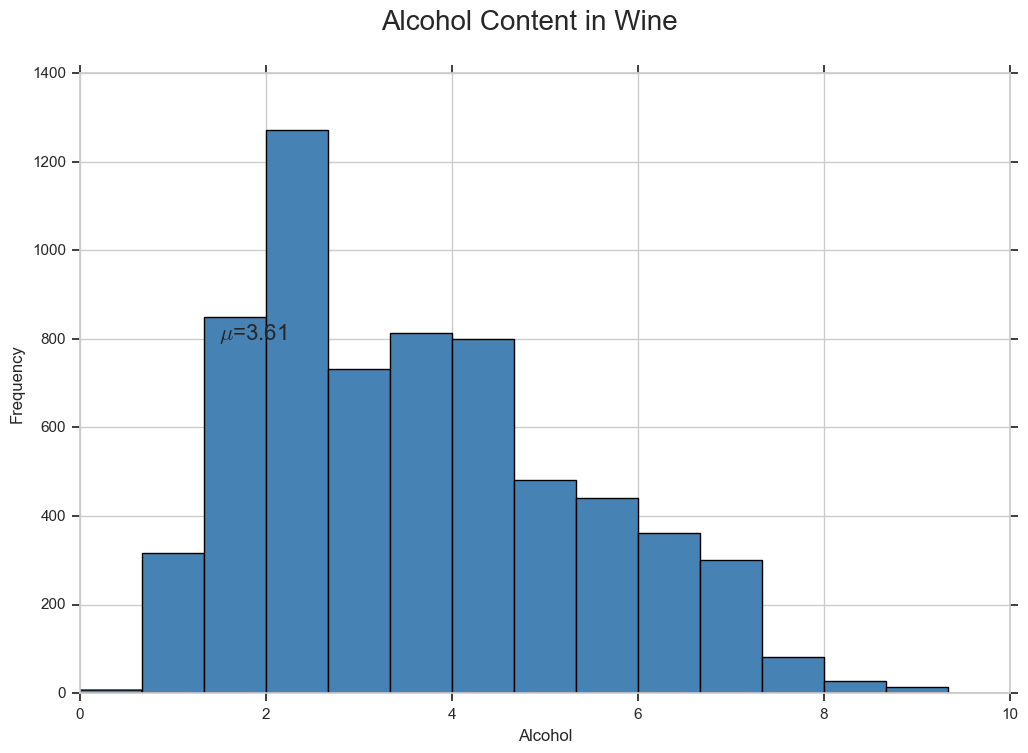

In [42]:

fig = plt.figure(figsize = (12,8))
title = fig.suptitle("Alcohol Content in Wine", fontsize=20)
fig.subplots_adjust(top=0.90, wspace=0.4)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Alcohol")
ax.set_ylabel("Frequency") 
ax.text(1.5, 800, r'$\mu$='+ str(round(df['alcohol'].mean(), 2)), 
         fontsize=16)
freq, bins, patches = ax.hist(df['alcohol'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

### Kernel Density Plot

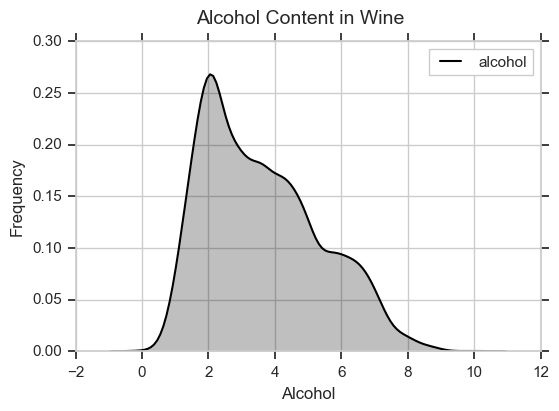

In [46]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Alcohol Content in Wine", fontsize=14)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Frequency") 
sb.kdeplot(df['alcohol'], ax=ax1, shade=True, color='black')

# Linear Regression using scikit learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
train, test = train_test_split(df, test_size=0.3, random_state=5)

In [17]:
y_train = train['quality']
x_train = train[df.columns[0:len(df.columns) - 1]]
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
673,2.396694,1.533333,1.807229,0.230061,0.481728,0.590278,2.857143,1.096973,4.961240,2.303371,3.768116
3231,2.479339,0.866667,2.228916,0.981595,0.481728,0.902778,2.327189,0.954309,2.015504,3.370787,5.072464
1764,2.396694,1.266667,1.506024,1.134969,0.730897,1.840278,4.516129,1.733179,3.875969,1.179775,1.884058
4997,3.553719,3.100000,1.084337,0.199387,1.179402,0.416667,0.668203,1.945248,4.496124,2.078652,1.449275
4051,2.479339,1.466667,1.626506,1.687117,0.315615,0.729167,2.096774,1.162522,1.860465,0.898876,5.362319


In [18]:
y_test = test['quality']
x_test = test[df.columns[0:len(df.columns) - 1]]

In [19]:
regression = LinearRegression()
regression.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_pred = regression.predict(x_train)
print(mean_squared_error(y_train, y_pred))

1.56691091195


In [21]:
y_pred_test = regression.predict(x_test)
print(mean_squared_error(y_test, y_pred_test))

1.34403216132


### Okay this is kinda good 

In [22]:
x_dummy = np.array([2.644628,1.266667,2.168675,3.082822,0.598007,1.527778,3.778802,2.677848,2.170543,1.292135, 1.159420])

def predict(x, reg):
    return np.dot(x.transpose(), reg.coef_)
        
print("Normalized wine quality is {}".format(predict(x_dummy, regression)))

Normalized wine quality is 0.5953755061146168


# Linear Regression using TensorFlow

In [23]:
data_X = df[df.columns[0:len(df.columns) - 1]].as_matrix().reshape(len(data), 11)
print("X shape {}".format(data_X.shape))
data_Y = df['quality'].as_matrix().reshape(len(data), 1)
print("Y shape {}".format(data_Y.shape))

X shape (6497, 11)
Y shape (6497, 1)


In [24]:
X = tf.placeholder(tf.float32, shape=[None, 11])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.zeros([11, 1]))
#b = tf.Variable(tf.zeros([1]))

In [25]:
y_pred = tf.sigmoid(tf.matmul(X, W))
y_pred.shape

TensorShape([Dimension(None), Dimension(1)])

In [26]:
loss = tf.reduce_mean(tf.square(y_pred - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
train = optimizer.minimize(loss)

correct = tf.cast(tf.equal(y_pred, Y), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [27]:
init = tf.global_variables_initializer()
loss_ = []
acc_ = []
print(6497 / 100)

64.97


In [31]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for e in range(1000):
        
        rand_ind = np.random.randint(4000, size=300)
        
        sess.run(train, feed_dict={X: data_X[rand_ind], Y: data_Y[rand_ind]})
    
        train_loss = sess.run(loss, feed_dict={X: data_X, Y: data_Y})
        
        if e % 50 == 0:
            print(train_loss)
            print(train_acc)
    
        loss_.append(train_loss)

19.5951
0.0
16.2624
0.0
15.9666
0.0
15.8914
0.0
15.8576
0.0
15.8388
0.0
15.8271
0.0
15.8193
0.0
15.8138
0.0
15.8096
0.0
15.8065
0.0
15.804
0.0
15.802
0.0
15.8004
0.0
15.7991
0.0
15.7979
0.0
15.797
0.0
15.7962
0.0
15.7954
0.0
15.7948
0.0


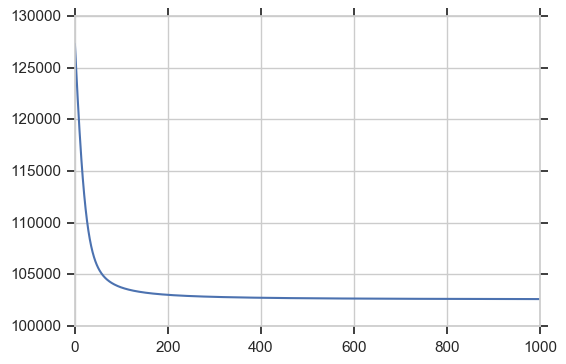

In [55]:
plt.plot(loss_)
plt.show()